In [4]:
import pandas as pd

In [6]:
cr=pd.read_csv(r"CreditRisk.csv")
cr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


In [12]:
cr.isnull().sum()[cr.isnull().sum() >0]

Series([], dtype: int64)

In [10]:
cr.Gender=cr.Gender.fillna('Male')
cr.Married=cr.Married.fillna('Yes')
cr.Self_Employed=cr.Self_Employed.fillna('Yes')
cr.Dependents=cr.Dependents.fillna(0)
cr.LoanAmount=cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term=cr.Loan_Amount_Term.fillna(cr.LoanAmount.mean())
cr.Credit_History=cr.Credit_History.fillna(0)


In [52]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int64  
 1   Married            981 non-null    int64  
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    int64  
 4   Self_Employed      981 non-null    int64  
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int64  
 11  Loan_Status        981 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 92.1 KB


In [30]:
cr.replace({'Male':0, 'Female':1},inplace =True)
cr.Married.replace({'No':0,'Yes':1},inplace=True)
cr.Self_Employed.replace({'No':0,'Yes':1},inplace=True)
cr.Loan_Status.replace({'N':0,'Y':1},inplace=True)
cr.Education.replace({'Graduate':1,'Not Graduate':2},inplace=True)
cr.Property_Area.replace({'Urban':1,'Rural':2,'Semiurban':3},inplace=True)
                     

C:\Users\alurp\AppData\Local\Temp\ipykernel_30112\1567876532.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cr.Married.replace({'No':0,'Yes':1},inplace=True)
C:\Users\alurp\AppData\Local\Temp\ipykernel_30112\1567876532.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [76]:
cr1=cr # Backup

In [ ]:
#cr=cr.drop(['Loan_ID',axis=1])

In [74]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,1,1
1,0,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,2,0
2,0,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,1,1
3,0,1,0.0,2,0,2583,2358.0,120.00000,360.0,1.0,1,1
4,0,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,1,1


In [54]:
from sklearn.model_selection import train_test_split
train_cr , test_cr= train_test_split(cr,test_size=.2)
train_cr_x=train_cr.iloc[:,0:-1]
train_cr_y=train_cr.iloc[:,-1]
test_cr_x=test_cr.iloc[:,0:-1]
test_cr_y=test_cr.iloc[:,-1]

In [56]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_cr_x , train_cr_y)

C:\Users\alurp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
pred_test=logreg.predict(test_cr_x)
pred_test

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [116]:
test_cr_y

181    0
553    0
251    0
245    0
712    1
      ..
144    1
127    1
513    0
770    1
407    1
Name: Loan_Status, Length: 197, dtype: int64

In [72]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(test_cr_y,pred_test)
tab1

array([[ 26,  28],
       [ 12, 131]], dtype=int64)

In [78]:
tab1.diagonal()

array([ 26, 131], dtype=int64)

In [66]:
tab1.diagonal().sum()

157

In [68]:
tab1.sum()

197

In [70]:
tab1.diagonal().sum()*100/tab1.sum()

79.69543147208122

In [100]:
from sklearn.metrics import precision_score, recall_score ,f1_score, accuracy_score

In [102]:
pre_score=precision_score(test_cr_y,pred_test)
pre_score

0.8238993710691824

In [104]:
rec_score= recall_score(test_cr_y,pred_test)
rec_score

0.916083916083916

In [106]:
2*pre_score*rec_score/(pre_score+rec_score)

0.8675496688741723

In [108]:
f1_score(test_cr_y,pred_test)

0.8675496688741722

In [110]:
accuracy_score(test_cr_y,pred_test)

0.7969543147208121

# AUROC 

In [132]:
from sklearn.metrics import roc_auc_score, roc_curve

In [151]:
pred_cr_test_prob=logreg.predict_proba(test_cr_x)
# pred_cr_test_prob--> probability of class
pred_cr_test_prob

array([[0.69234522, 0.30765478],
       [0.70054563, 0.29945437],
       [0.3065166 , 0.6934834 ],
       [0.13454997, 0.86545003],
       [0.16776841, 0.83223159],
       [0.26183559, 0.73816441],
       [0.59289073, 0.40710927],
       [0.04596699, 0.95403301],
       [0.09103585, 0.90896415],
       [0.11296718, 0.88703282],
       [0.11197808, 0.88802192],
       [0.09991509, 0.90008491],
       [0.17724693, 0.82275307],
       [0.75927918, 0.24072082],
       [0.33209439, 0.66790561],
       [0.234827  , 0.765173  ],
       [0.62547648, 0.37452352],
       [0.18812987, 0.81187013],
       [0.74528709, 0.25471291],
       [0.24261434, 0.75738566],
       [0.25182117, 0.74817883],
       [0.22858596, 0.77141404],
       [0.12160281, 0.87839719],
       [0.11373858, 0.88626142],
       [0.16080067, 0.83919933],
       [0.16663251, 0.83336749],
       [0.16572717, 0.83427283],
       [0.10275767, 0.89724233],
       [0.13277186, 0.86722814],
       [0.13432105, 0.86567895],
       [0.

In [136]:
type(pred_cr_test_prob)

numpy.ndarray

In [138]:
pred_cr_test_prob.shape

(197, 2)

In [140]:
roc_auc_score(test_cr_y,pred_cr_test_prob[:,1])

0.6907536907536909

In [144]:
fpr,tpr ,ther =roc_curve(test_cr_y,pred_cr_test_prob[:,1])

In [146]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'TPR')

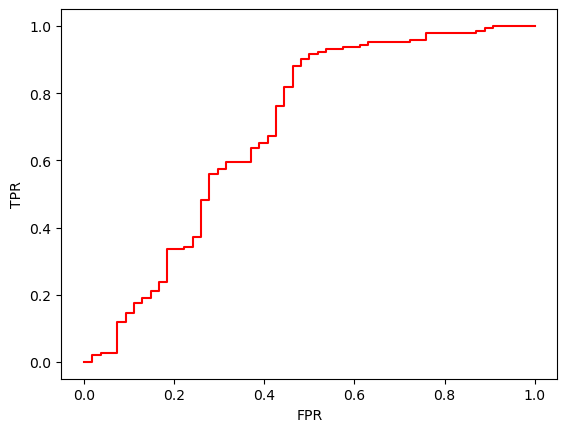

In [155]:
plt.plot(fpr,tpr, color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
# more the auroc the better is the model 